# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [14]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
units = "metric"

In [16]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | la ronge
Processing Record 2 of Set 1 | cranbrook
Processing Record 3 of Set 1 | dzuunharaa
Processing Record 4 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 5 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 6 of Set 1 | fort st. john
Processing Record 7 of Set 1 | lambarene
Processing Record 8 of Set 1 | whitehorse
Processing Record 9 of Set 1 | olonkinbyen
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | tsiombe
Processing Record 12 of Set 1 | hotan
Processing Record 13 of Set 1 | zaozersk
Processing Record 14 of Set 1 | pisco
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | cooma
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | west island
Processing Record 21 of Set 1 | bethel
Processi

Processing Record 40 of Set 4 | fayroz koh
Processing Record 41 of Set 4 | howard springs
Processing Record 42 of Set 4 | talnakh
Processing Record 43 of Set 4 | el calafate
Processing Record 44 of Set 4 | moratuwa
Processing Record 45 of Set 4 | korla
Processing Record 46 of Set 4 | faya-largeau
Processing Record 47 of Set 4 | kishtwar
Processing Record 48 of Set 4 | hithadhoo
Processing Record 49 of Set 4 | dubbo
Processing Record 0 of Set 5 | vernon
Processing Record 1 of Set 5 | san juan bautista
Processing Record 2 of Set 5 | slavyanka
Processing Record 3 of Set 5 | ordos
City not found. Skipping...
Processing Record 4 of Set 5 | wailua homesteads
Processing Record 5 of Set 5 | st. john's
Processing Record 6 of Set 5 | vadso
Processing Record 7 of Set 5 | saipan
Processing Record 8 of Set 5 | kargasok
Processing Record 9 of Set 5 | khilok
Processing Record 10 of Set 5 | laojunmiao
Processing Record 11 of Set 5 | malindi
Processing Record 12 of Set 5 | kotlas
Processing Record 13 o

Processing Record 33 of Set 8 | arteche
Processing Record 34 of Set 8 | axim
Processing Record 35 of Set 8 | nikolayevsk-on-amure
Processing Record 36 of Set 8 | kerikeri
Processing Record 37 of Set 8 | saint-pourcain-sur-sioule
Processing Record 38 of Set 8 | stephenville
Processing Record 39 of Set 8 | new norfolk
Processing Record 40 of Set 8 | machali
Processing Record 41 of Set 8 | boende
Processing Record 42 of Set 8 | casablanca
Processing Record 43 of Set 8 | sitka
Processing Record 44 of Set 8 | jamaame
Processing Record 45 of Set 8 | santa ana
Processing Record 46 of Set 8 | salur
Processing Record 47 of Set 8 | morehead city
Processing Record 48 of Set 8 | necochea
Processing Record 49 of Set 8 | sisimiut
Processing Record 0 of Set 9 | sarupathar
Processing Record 1 of Set 9 | trondheim
Processing Record 2 of Set 9 | pizarro
Processing Record 3 of Set 9 | kiunga
Processing Record 4 of Set 9 | charleston
Processing Record 5 of Set 9 | kavaratti
Processing Record 6 of Set 9 | 

Processing Record 25 of Set 12 | zhanibek
Processing Record 26 of Set 12 | zhanaozen
Processing Record 27 of Set 12 | rio grande
Processing Record 28 of Set 12 | presidente epitacio
Processing Record 29 of Set 12 | el bayadh
-----------------------------
Data Retrieval Complete      
-----------------------------


In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,la ronge,55.1001,-105.2842,12.14,82,75,2.06,CA,1695915795
1,cranbrook,49.4999,-115.7688,5.91,87,75,1.03,CA,1695916067
2,dzuunharaa,48.8523,106.4579,5.40,94,97,1.50,MN,1695916067
3,fort st. john,56.2499,-120.8529,7.94,93,100,2.57,CA,1695916015
4,lambarene,-0.7001,10.2406,29.12,67,82,1.92,GA,1695916068


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,la ronge,55.1001,-105.2842,12.14,82,75,2.06,CA,1695915795
1,cranbrook,49.4999,-115.7688,5.91,87,75,1.03,CA,1695916067
2,dzuunharaa,48.8523,106.4579,5.40,94,97,1.50,MN,1695916067
3,fort st. john,56.2499,-120.8529,7.94,93,100,2.57,CA,1695916015
4,lambarene,-0.7001,10.2406,29.12,67,82,1.92,GA,1695916068


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

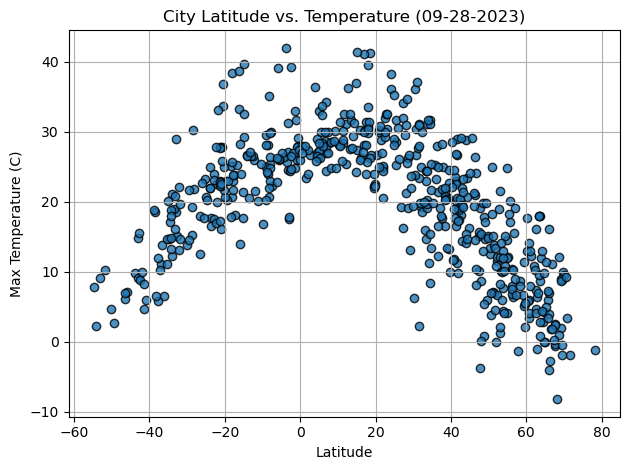

In [22]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

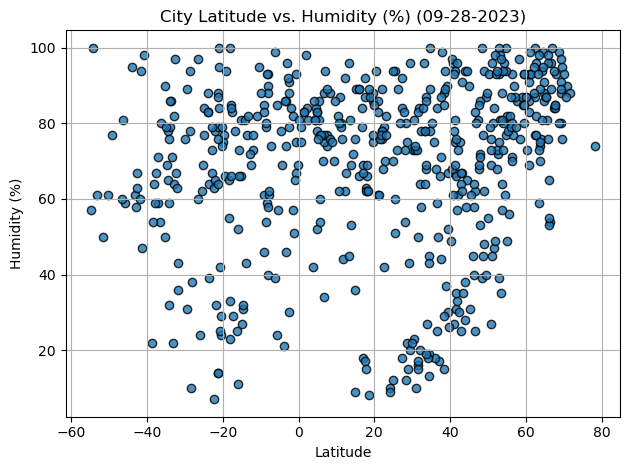

In [24]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (%) ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

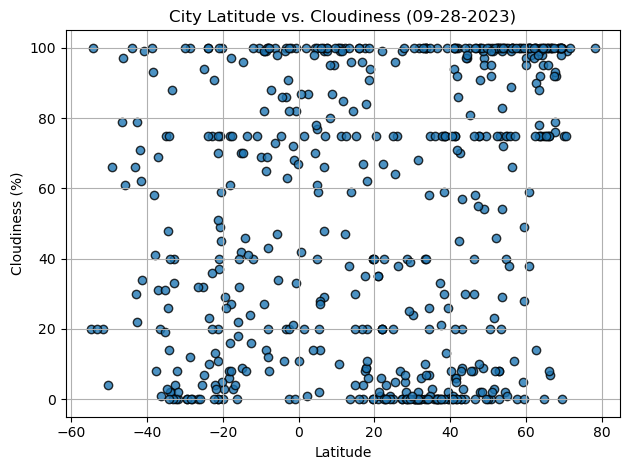

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

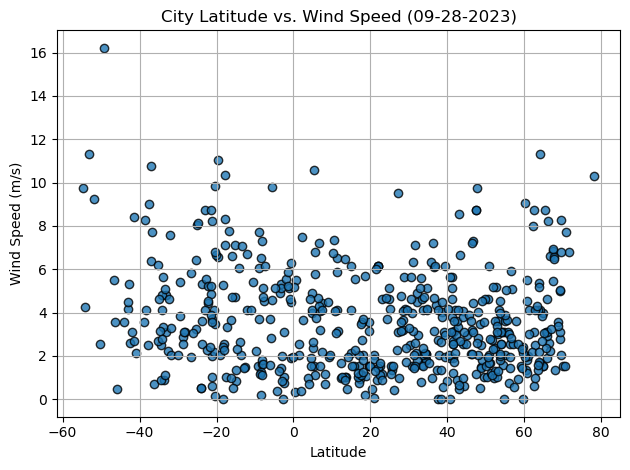

In [28]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def 
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,la ronge,55.1001,-105.2842,12.14,82,75,2.06,CA,1695915795
1,cranbrook,49.4999,-115.7688,5.91,87,75,1.03,CA,1695916067
2,dzuunharaa,48.8523,106.4579,5.40,94,97,1.50,MN,1695916067
3,fort st. john,56.2499,-120.8529,7.94,93,100,2.57,CA,1695916015
5,whitehorse,60.7161,-135.0538,6.01,91,100,1.79,CA,1695915529


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,lambarene,-0.7001,10.2406,29.12,67,82,1.92,GA,1695916068
8,tsiombe,-25.3000,45.4833,23.24,69,32,6.42,MG,1695915540
11,pisco,-13.7000,-76.2167,20.57,77,75,2.06,PE,1695915268
12,port-aux-francais,-49.3500,70.2167,2.73,77,66,16.22,TF,1695915508
13,cooma,-36.2333,149.1333,6.50,80,1,0.71,AU,1695916069


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8117954444504412


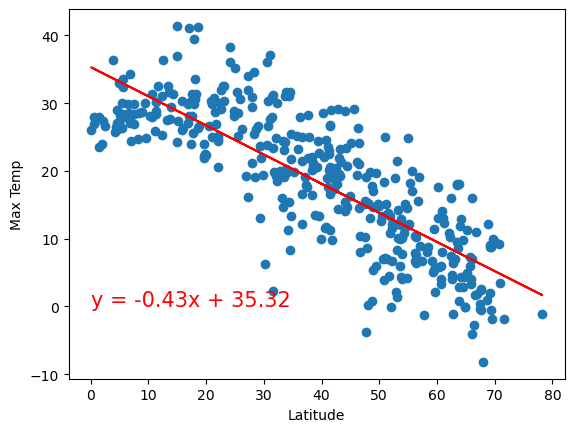

In [35]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')


The r-value is 0.7537081103304439


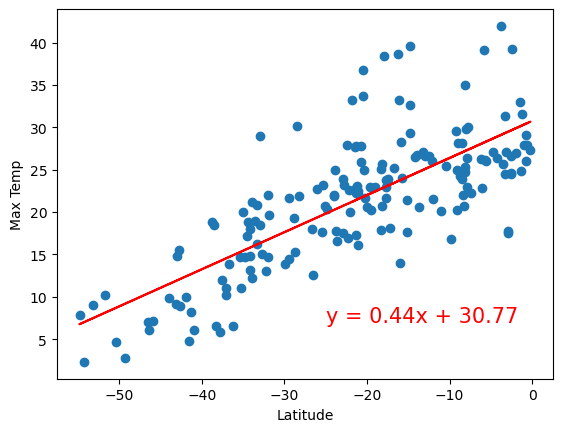

In [44]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,7),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** 
For Northern Hemisphere:
The regression displays a negative relationship between temperature and latitude.
As it shown on the regression display, with the latitude increases, the highest temperature decreases.
It means the further north from equator, the colder the temperature is.

For Southern Hemisphere:
The regression displays a positive relationship between temperature and latitude.
As it shown on the regression display, as the latitude decreases, the highest temperature decreases.
It means the further south from equator, the colder the temperature is.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.191440805342817


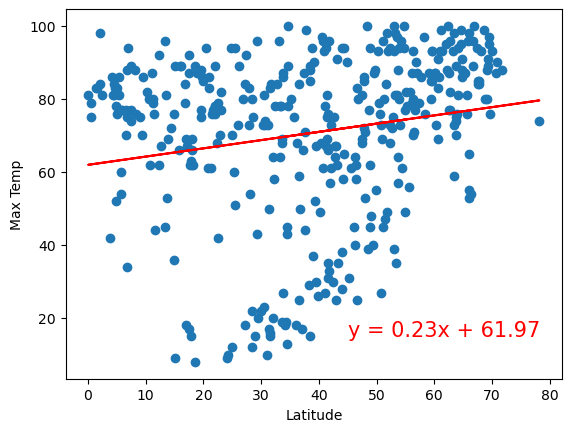

In [53]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')

The r-value is 0.054456461202380346


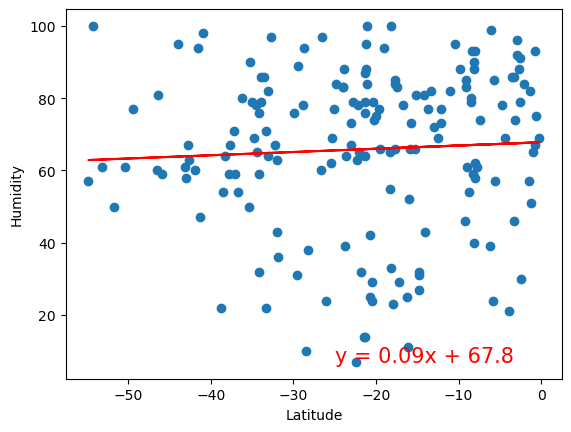

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,7),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** 

Humidity and latitude are both positive correlated in both Northern and Southern Hemisphere.

However, the linear relationship between humidity and latitude are weak in both Northern and Southern Hemisphere, more specifically, it is even weaker in Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.24006836421536393


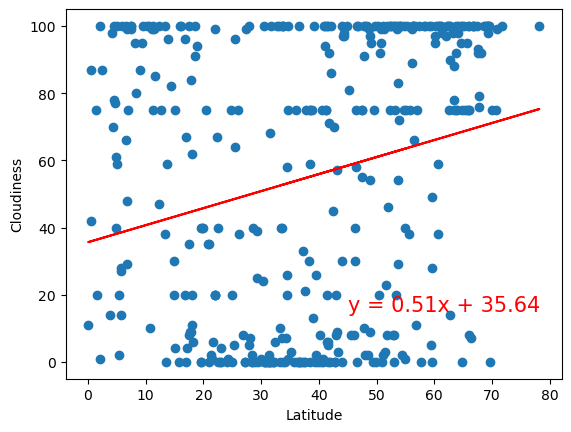

In [55]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

The r-value is 0.18545479543897753


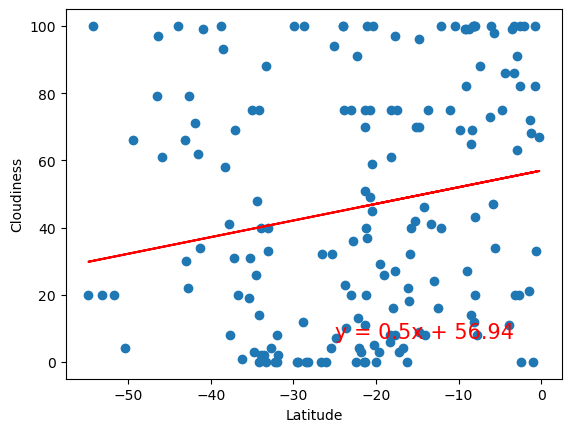

In [56]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,7),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** 

Cloudiness and latitude are both positive correlated in both Northern and Southern Hemisphere.

However, the linear relationship between cloudiness and latitude are weak in both Northern and Southern Hemisphere, more specifically, it is even weaker in Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.0981915025405947


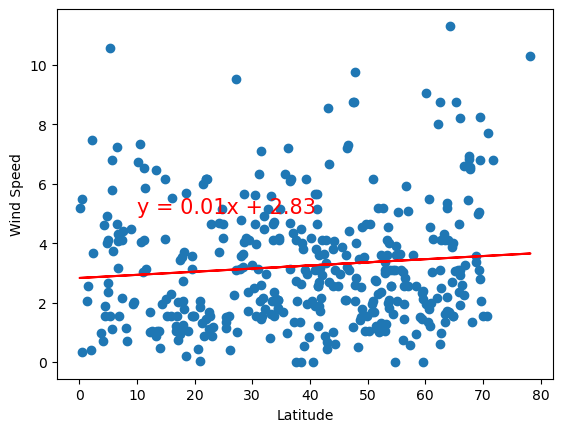

In [65]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(10,5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

The r-value is -0.2079622691320595


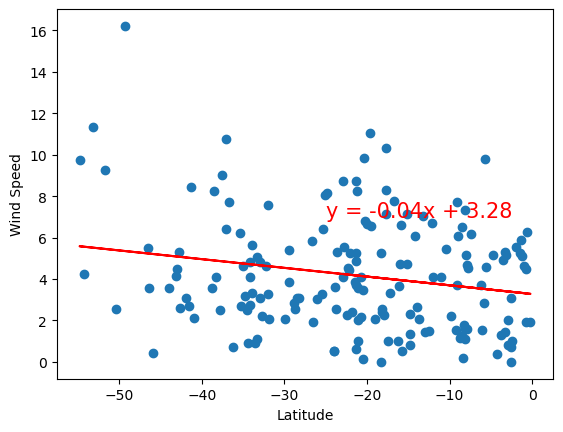

In [58]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,7),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** 

Wind speed and latitude are positive correlated in Northern Hemisphere, which means the further north from equator, the higher the wind speed is; while in Southern Hemisphere, they are negative correlated, which means the further south from equator, the higher the wind speed is.

However, the linear relationship between cloudiness and latitude are weak in both Northern and Southern Hemisphere, more specifically, it is even weaker in Northern Hemisphere.